## **Breast Cancer Detection**

**The IARC statistics show that breast cancer accounts for 25% of all cancer cases diagnosed in women worldwide. Around 53% of these cases come from developing countries, which represent 82% of the world population. It is reported that 626,700 deaths will occur only in 2018. Breast cancer is the leading cause of cancer death among women in developing countries and the second leading cause of cancer death (following lung cancer) among women in developed countries.
The key challenge in cancer detection is how to classify tumors into malignant or benign machine learning techniques can dramatically improves the accuracy of diagnosis**

**The types of cancer:**

*   Belign - less dangerous
*   Malignant - more dangerous



***Early detection of cancer into belign or malignant helps in the treatment and this results in saving lakhs of life.***

**Machine learning and Deep learning techinques are used for the detection task ,i.e, predicts wheather the cancer is malignant or benign**

## About Dataset

Dataset : Breast Cancer Wisconsin (Diagnostic) Data Set [https://www.kaggle.com/uciml/breast-cancer-wisconsin-data]

Attribute Information:

1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)

b) texture (standard deviation of gray-scale values)

c) perimeter

d) area

e) smoothness (local variation in radius lengths)

f) compactness (perimeter^2 / area - 1.0)

g) concavity (severity of concave portions of the contour)

h) concave points (number of concave portions of the contour)

i) symmetry

j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

## Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import itertools
import plotly.offline as py
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

np.random.seed(2)

In [ ]:
from google.colab import files
 # Use to load data on Google Colab 
uploaded = files.upload() # Use to load data on Google Colab 
data = pd.read_csv('data.csv') 
data.head(7)

Saving data.csv to data.csv


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.1127,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368


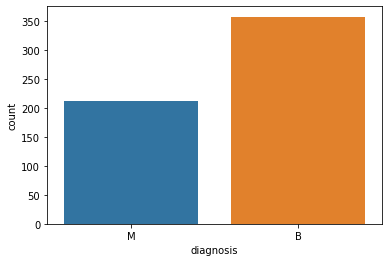

In [ ]:
sns.countplot(data['diagnosis'],label="count")

In [ ]:
# Assigning Values for labels
# Malignant is 1, Belign is 0 
data['diagnosis']=data['diagnosis'].map({'M':1,'B':0})

In [ ]:
data.describe()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
# Dropping 'id' column
data = data.drop(["id"],axis=1)
# Dropping the unnamed column
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]

In [ ]:
# displaying first 100 rows 
data.head(100)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.053730,0.015870,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.66560,0.71190,0.26540,0.4601,0.11890
1,1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.018600,0.013400,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.18660,0.24160,0.18600,0.2750,0.08902
2,1,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.038320,0.020580,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.42450,0.45040,0.24300,0.3613,0.08758
3,1,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.056610,0.018670,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.86630,0.68690,0.25750,0.6638,0.17300
4,1,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.056880,0.018850,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.20500,0.40000,0.16250,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,20.260,23.03,132.40,1264.0,0.09078,0.13130,0.146500,0.086830,0.2095,0.05649,0.7576,1.5090,4.554,87.87,0.006016,0.03482,0.042320,0.012690,0.02657,0.004411,24.22,31.59,156.10,1750.0,0.1190,0.35390,0.40980,0.15730,0.3689,0.08368
96,0,12.180,17.84,77.79,451.1,0.10450,0.07057,0.024900,0.029410,0.1900,0.06635,0.3661,1.5110,2.410,24.44,0.005433,0.01179,0.011310,0.015190,0.02220,0.003408,12.83,20.92,82.14,495.2,0.1140,0.09358,0.04980,0.05882,0.2227,0.07376
97,0,9.787,19.94,62.11,294.5,0.10240,0.05301,0.006829,0.007937,0.1350,0.06890,0.3350,2.0430,2.132,20.05,0.011130,0.01463,0.005308,0.005250,0.01801,0.005667,10.92,26.29,68.81,366.1,0.1316,0.09473,0.02049,0.02381,0.1934,0.08988
98,0,11.600,12.84,74.34,412.6,0.08983,0.07525,0.041960,0.033500,0.1620,0.06582,0.2315,0.5391,1.475,15.75,0.006153,0.01330,0.016930,0.006884,0.01651,0.002551,13.06,17.16,82.96,512.5,0.1431,0.18510,0.19220,0.08449,0.2772,0.08756


In [ ]:
# function to display confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

  
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

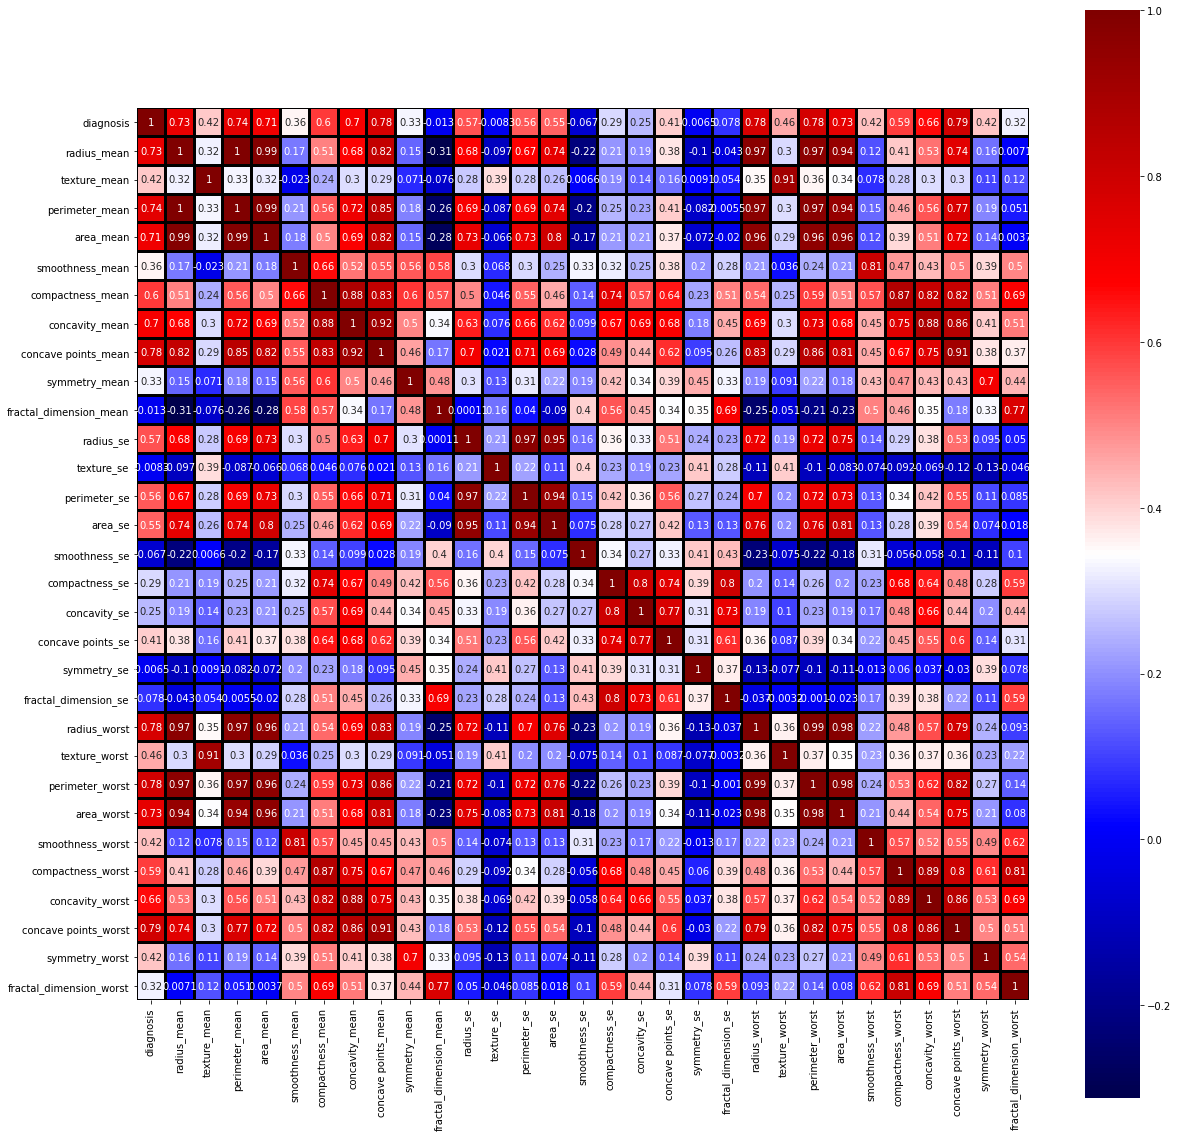

In [ ]:
# Correlation map
f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(data.corr(), annot=True, square=True, cmap='seismic', linewidths=2, linecolor='black',ax=ax);
plt.show()

## Feature Extraction

By defination, Feature extraction is a process of dimensionality reduction by which an initial set of raw data is reduced to more manageable groups for processing.

All 30 parameters do not have significance in prediction. Correlation matrix gives an idea of how these parameters individually have effect on the prediction of diagnoisis.

Here we removed all those features which have correlation less than or equal to 0.4 with diagnosis.

In [ ]:
col_corr = set()
corr_matrix = data.corr()
for i in range(len(corr_matrix.columns)):
  for j in range(i):
    if(corr_matrix.iloc[i,0]<=0.4)and(corr_matrix.columns[j] not in col_corr):
      colname = corr_matrix.columns[i]
      col_corr.add(colname)
      if colname in data.columns:
        del data[colname]

In [ ]:
print("After removing the least significance features: ",data.shape)

After removing the least significance features:  (569, 21)


In [ ]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave points_mean,radius_se,perimeter_se,area_se,concave points_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst
0,1,17.99,10.38,122.80,1001.0,0.27760,0.3001,0.14710,1.0950,8.589,153.40,0.01587,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601
1,1,20.57,17.77,132.90,1326.0,0.07864,0.0869,0.07017,0.5435,3.398,74.08,0.01340,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750
2,1,19.69,21.25,130.00,1203.0,0.15990,0.1974,0.12790,0.7456,4.585,94.03,0.02058,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613
3,1,11.42,20.38,77.58,386.1,0.28390,0.2414,0.10520,0.4956,3.445,27.23,0.01867,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638
4,1,20.29,14.34,135.10,1297.0,0.13280,0.1980,0.10430,0.7572,5.438,94.44,0.01885,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364


In [ ]:
# Splitting the dataframe into input and outputs
# X is input dataframe wherease Y is output,i.e,diagnosis
X = data.iloc[:,data.columns!="diagnosis"]
Y = data.iloc[:,data.columns =="diagnosis"]

In [ ]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave points_mean,radius_se,perimeter_se,area_se,concave points_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst
0,17.99,10.38,122.80,1001.0,0.27760,0.3001,0.14710,1.0950,8.589,153.40,0.01587,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601
1,20.57,17.77,132.90,1326.0,0.07864,0.0869,0.07017,0.5435,3.398,74.08,0.01340,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750
2,19.69,21.25,130.00,1203.0,0.15990,0.1974,0.12790,0.7456,4.585,94.03,0.02058,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613
3,11.42,20.38,77.58,386.1,0.28390,0.2414,0.10520,0.4956,3.445,27.23,0.01867,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638
4,20.29,14.34,135.10,1297.0,0.13280,0.1980,0.10430,0.7572,5.438,94.44,0.01885,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364


In [ ]:
Y.head()

,diagnosis
0,1
1,1
2,1
3,1
4,1


In [ ]:
# spliting the dataset into training and testing datasets
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=0)
# Feature Scaling
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
x_train.shape

(398, 20)

In [ ]:
x_test.shape

(171, 20)

In [ ]:
x_train[0]

array([-0.74998027, -1.09978744, -0.74158608, -0.70188697, -0.42772603,
       -0.45754987, -0.7605498 , -0.70061171, -0.6167312 , -0.54340833,
       -0.62177677, -0.7984831 , -0.591967  , -0.74660155, -0.71452908,
        0.11632807, -0.34125524, -0.04627198, -0.6235968 ,  0.07754241])

## Neural Network

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [ ]:
# Creating a model with 5 layers
# Activation function sigmoid used since the expected output is binary
model = Sequential([
    Dense(units=16,input_dim=20,activation="relu"),
    Dense(16,activation="relu"),
    Dropout(0.2),
    Dense(16,activation="relu"),
    Dense(16,activation="relu"),
    Dense(1,activation="sigmoid")
])

In [ ]:
# summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                336       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 1,169
Trainable params: 1,169
Non-trainable params: 0
______________________________________________________

In [ ]:
# optimizer is 'adam'
# loss function is BinaryCrossentropy()
model.compile(optimizer="adam",loss=tf.keras.losses.BinaryCrossentropy(),metrics=["accuracy"])

# The model is trained for 25 epochs with batch_size of 15
model.fit(x_train,y_train,batch_size=15,epochs=25)

Epoch 1/25
27/27 [==============================] - 0s 1ms/step - loss: 0.5806 - accuracy: 0.8568
Epoch 2/25
27/27 [==============================] - 0s 1ms/step - loss: 0.3917 - accuracy: 0.8945
Epoch 3/25
27/27 [==============================] - 0s 1ms/step - loss: 0.2240 - accuracy: 0.9422
Epoch 4/25
27/27 [==============================] - 0s 1ms/step - loss: 0.1485 - accuracy: 0.9598
Epoch 5/25
27/27 [==============================] - 0s 2ms/step - loss: 0.1418 - accuracy: 0.9598
Epoch 6/25
27/27 [==============================] - 0s 1ms/step - loss: 0.1226 - accuracy: 0.9673
Epoch 7/25
27/27 [==============================] - 0s 1ms/step - loss: 0.1215 - accuracy: 0.9724
Epoch 8/25
27/27 [==============================] - 0s 1ms/step - loss: 0.1045 - accuracy: 0.9673
Epoch 9/25
27/27 [==============================] - 0s 1ms/step - loss: 0.0966 - accuracy: 0.9698
Epoch 10/25
27/27 [==============================] - 0s 1ms/step - loss: 0.0808 - accuracy: 0.9749
Epoch 11/25
27/27 [

In [ ]:
# Evaluating model for test dataset
pred_nn=model.evaluate(x_test,y_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.0410 - accuracy: 0.9825


In [ ]:
predic = model.predict(x_test)
y_test = pd.DataFrame(y_test)
res_NN = confusion_matrix(y_test,predic.round())

Confusion matrix, without normalization
[[107   1]
 [  2  61]]


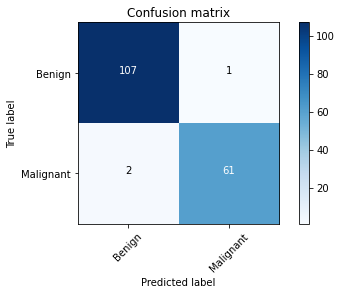

In [ ]:
# confusion matrix
plot_confusion_matrix(res_NN,classes=['Benign','Malignant'])

## Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor


model_RF = RandomForestClassifier(n_estimators=10000,random_state=42,n_jobs=-1,oob_score=True,max_features=20)

#train the classifier
model_RF.fit(x_train,y_train)

#predict the test data
y_pred = model_RF.predict(x_test)

print("Accuracy score")
print(accuracy_score(y_test, y_pred)*100)
print("\n")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Accuracy score
97.6608187134503




In [ ]:
# precision, recall, f1-score, support data
results_RF=metrics.classification_report(y_true=y_test, y_pred=y_pred)
print(results_RF)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       108
           1       0.97      0.97      0.97        63

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



In [ ]:
predic = model_RF.predict(x_test)
y_test = pd.DataFrame(y_test)
res_RF = confusion_matrix(y_test,predic.round())

Confusion matrix, without normalization
[[106   2]
 [  2  61]]


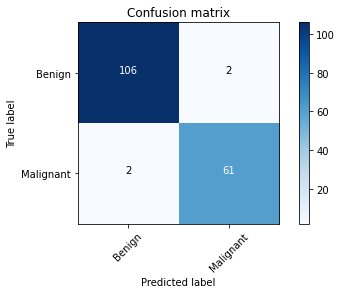

In [ ]:
plot_confusion_matrix(res_RF,classes=['Benign','Malignant'])

## Logistic Regression

In [ ]:
#Using Logistic Regression 
from sklearn.linear_model import LogisticRegression
model_log = LogisticRegression()
#log.fit(X_train, Y_train)

In [ ]:
#Giving different hyper parameters
param_combo=[    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]


In [ ]:
#Finding all possible combinations(fits) using GridSearch
from sklearn.model_selection import GridSearchCV

In [ ]:
clf = GridSearchCV(model_log, param_grid = param_combo, cv = 3, verbose=True, n_jobs=-1)

In [ ]:
best_clf = clf.fit(x_train,y_train)

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 522 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 2122 tasks      | elapsed:   38.7s
[Parallel(n_jobs=-1)]: Done 4426 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 4800 out of 4800 | elapsed:  2.1min finished
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



In [ ]:
#Finding best combination for logistic regression
best_clf.best_estimator_

LogisticRegression(C=0.615848211066026, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print('Logistic Regression Training Accuracy:', best_clf.score(x_train, y_train)*100)

Logistic Regression Training Accuracy: 98.49246231155779


In [ ]:
pred = best_clf.predict(x_test)
y_test = pd.DataFrame(y_test)
res_LR = confusion_matrix(y_test,pred.round())
print('Logistic Regression Testing Accuracy:',accuracy_score(y_test, pred)*100)

Logistic Regression Testing Accuracy: 98.24561403508771


In [ ]:
results_log=metrics.classification_report(y_true=y_test, y_pred=pred)
print(results_log)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       108
           1       0.98      0.97      0.98        63

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



Confusion matrix, without normalization
[[107   1]
 [  2  61]]


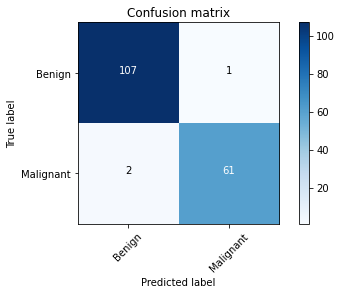

In [ ]:
plot_confusion_matrix(res_LR,classes=['Benign','Malignant'])

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors = 10) 
model_knn.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [ ]:
print('Training accuracy:',model_knn.score(x_train, y_train)*100)

Training accuracy: 96.4824120603015


In [ ]:
model_knn.score(x_test, y_test)

0.9649122807017544

In [ ]:
pred_knn = model_knn.predict(x_test)
y_test = pd.DataFrame(y_test)
res_knn = confusion_matrix(y_test,pred_knn.round())
print('Testing accuracy:',accuracy_score(y_test, pred_knn)*100)

Testing accuracy: 96.49122807017544


In [ ]:
results_knn=metrics.classification_report(y_true=y_test, y_pred=pred_knn)
print(results_knn)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       108
           1       0.97      0.94      0.95        63

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



Confusion matrix, without normalization
[[106   2]
 [  4  59]]


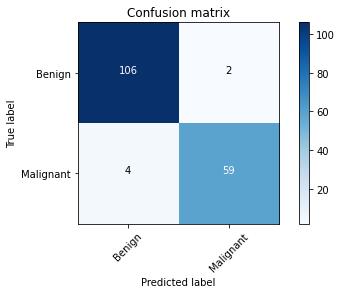

In [ ]:
plot_confusion_matrix(res_knn,classes=['Benign','Malignant'])

## SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
model_svc=SVC()

In [ ]:
model_svc.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_predict = model_svc.predict(x_test)

In [ ]:
y_test = pd.DataFrame(y_test)
res_svc = confusion_matrix(y_test,y_predict.round())
print(accuracy_score(y_test, y_predict)*100)
print(res_svc)

96.49122807017544
[[105   3]
 [  3  60]]


In [ ]:
results_svc=metrics.classification_report(y_true=y_test, y_pred=y_predict)
print(results_svc)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       108
           1       0.95      0.95      0.95        63

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



In [ ]:
print('Training accuracy:',model_svc.score(x_train, y_train)*100)

Training accuracy: 98.24120603015075


In [ ]:
print('Testing accuracy:',accuracy_score(y_test, y_predict)*100)

Testing accuracy: 96.49122807017544


Confusion matrix, without normalization
[[105   3]
 [  3  60]]


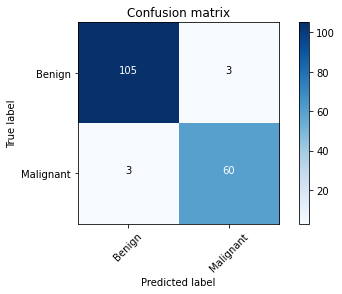

In [ ]:
plot_confusion_matrix(res_svc,classes=['Benign','Malignant'])

## Comparison

In [ ]:
def results(conmat1, conmat2, conmat3, conmat4, conmat5):
  TN = conmat1[0][0] #True negative
  TP = conmat1[1][1] #True Positive
  FN = conmat1[1][0] #False negative
  FP = conmat1[0][1] #False Positive
    

  accuracy1 = ((TP + TN) / (TP + TN + FN + FP))*100
  Precision1 = ((TP) / (TP + FP))*100
  Recall1 = ((TP) / (TP + FN))*100
  Specificity1 = ((TN) / (TN + FP))*100
  print("Neural Network(NN)")
  print(' Testing Accuracy =',accuracy1)
  print(' Precison =',Precision1)
  print(' Recall =',Recall1)
  print(' Specificity =',Specificity1)


  TN = conmat2[0][0] #True negative
  TP = conmat2[1][1] #True Positive
  FN = conmat2[1][0] #False negative
  FP = conmat2[0][1] #False Positive
    
  accuracy2 = ((TP + TN) / (TP + TN + FN + FP))*100
  Precision2 = ((TP) / (TP + FP))*100
  Recall2 = ((TP) / (TP + FN))*100
  Specificity2 = ((TN) / (TN + FP))*100
  print("Random Forest(RF)")
  print(' Testing Accuracy =',accuracy2)
  print(' Precison =',Precision2)
  print(' Recall =',Recall2)
  print(' Specificity =',Specificity2)


  TN = conmat3[0][0] #True negative
  TP = conmat3[1][1] #True Positive
  FN = conmat3[1][0] #False negative
  FP = conmat3[0][1] #False Positive
    
  accuracy3 = ((TP + TN) / (TP + TN + FN + FP))*100
  Precision3 = ((TP) / (TP + FP))*100
  Recall3 = ((TP) / (TP + FN))*100
  Specificity3 = ((TN) / (TN + FP))*100
  print("Logistic Regression(LR)")
  print(' Testing Accuracy =',accuracy3)
  print(' Precison =',Precision3)
  print(' Recall =',Recall3)
  print(' Specificity =',Specificity3)


  TN = conmat4[0][0] #True negative
  TP = conmat4[1][1] #True Positive
  FN = conmat4[1][0] #False negative
  FP = conmat4[0][1] #False Positive
    
  accuracy4 = ((TP + TN) / (TP + TN + FN + FP))*100
  Precision4 = ((TP) / (TP + FP))*100
  Recall4 = ((TP) / (TP + FN))*100
  Specificity4 = ((TN) / (TN + FP))*100
  print("KNN")
  print(' Testing Accuracy =',accuracy4)
  print(' Precison =',Precision4)
  print(' Recall =',Recall4)
  print(' Specificity =',Specificity4)


  TN = conmat5[0][0] #True negative
  TP = conmat5[1][1] #True Positive
  FN = conmat5[1][0] #False negative
  FP = conmat5[0][1] #False Positive
    
  accuracy5 = ((TP + TN) / (TP + TN + FN + FP))*100
  Precision5 = ((TP) / (TP + FP))*100
  Recall5 = ((TP) / (TP + FN))*100
  Specificity5 = ((TN) / (TN + FP))*100
  print("SVM")
  print(' Testing Accuracy =',accuracy5)
  print(' Precison =',Precision5)
  print(' Recall =',Recall5)
  print(' Specificity =',Specificity5)

  Accuracy = [accuracy1, accuracy2, accuracy3, accuracy4, accuracy5]
  Precision = [Precision1, Precision2, Precision3, Precision4, Precision5]
  Recall = [Recall1, Recall2, Recall3, Recall4, Recall5]
  Specificity = [Specificity1, Specificity2, Specificity3, Specificity4, Specificity5]

  index = ['NN', 'RF', 'LR', 'KNN', 'SVM']

  df = pd.DataFrame({'Accuracy': Accuracy,'Precision': Precision,'Recall': Recall,'Specificity':Specificity}, index =index)

  ax = df.plot.bar(figsize=(25,10),rot=0)

Neural Network(NN)
 Testing Accuracy = 98.24561403508771
 Precison = 98.38709677419355
 Recall = 96.82539682539682
 Specificity = 99.07407407407408
Random Forest(RF)
 Testing Accuracy = 97.6608187134503
 Precison = 96.82539682539682
 Recall = 96.82539682539682
 Specificity = 98.14814814814815
Logistic Regression(LR)
 Testing Accuracy = 98.24561403508771
 Precison = 98.38709677419355
 Recall = 96.82539682539682
 Specificity = 99.07407407407408
KNN
 Testing Accuracy = 96.49122807017544
 Precison = 96.72131147540983
 Recall = 93.65079365079364
 Specificity = 98.14814814814815
SVM
 Testing Accuracy = 96.49122807017544
 Precison = 95.23809523809523
 Recall = 95.23809523809523
 Specificity = 97.22222222222221


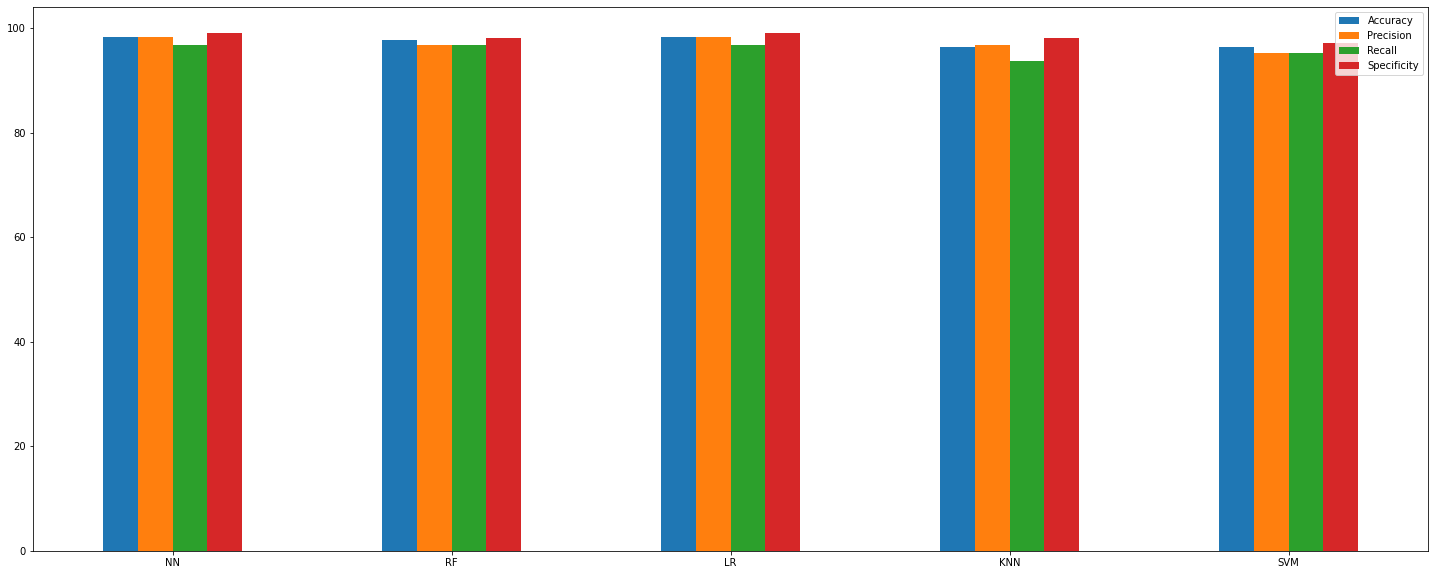

In [ ]:
# From the below graph it can be observed that the testing accuracy of the Logistic Regression(LR) is higher 
# Precision is also higher in the case of LR
# Recall is higher for Neural Network
# Specificity is also higher in case of LR
results(res_NN,res_RF,res_LR,res_knn,res_svc)

In [ ]:
# choosing the LR model since it has higher accuracy and accuracy is the important metrics in the Medical domain
from numpy import array
# belign case
X_in = [-0.74998027, -1.09978744, -0.74158608, -0.70188697, -0.42772603,
       -0.45754987, -0.7605498 , -0.70061171, -0.6167312 , -0.54340833,
       -0.62177677, -0.7984831 , -0.591967  , -0.74660155, -0.71452908,
        0.11632807, -0.34125524, -0.04627198, -0.6235968 ,  0.07754241]

X_in = array([X_in]) 
y_out = best_clf.predict(X_in)
print(y_out)
# the predicted output is also belign

[0]
